In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2015,3,3) - dt.timedelta(days=200)
ed = dt.datetime(2023,4,7) + dt.timedelta(days=1)

qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

ffty = ab.StockData('FFTY')
ffty.get_data_from_yfinance('FFTY',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = qqq
#set max number of rows to display
pd.set_option('display.max_rows', 1000)

GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
test_start = dt.datetime(2016,1,1)
test_end =   dt.datetime(2023,3,1)
plot_start = dt.datetime(2016,1,1)
plot_end =   dt.datetime(2023,3,1)

In [3]:
#buy and hold
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
bah.run_strategy(ticker,test_start,test_end)

/home/zishuowang/backtesting/Ab.py:161: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  sd = indicator.data.index[indicator.data.index.get_loc(


In [4]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,ticker,test_start,test_end)


<Ab.StockData object at 0x7efe4820b010>:
cumulative return      : 165.94%
compound anual return  : 5.1948%
max_drawdown           : -35.52%
sharp_ratio            : 4.44%
average of daily return: 0.0651%
std of daily return    : 1.4677%
number of trades       : 2,
trading days           : 2613,
batting Average        : 100.00%
Gain Average           : 165.94%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0 2016-01-04  2023-03-01 00:00:00    QQQ  0.009132      109.5  291.200012   

     Profit  Profit %  
0  1.659361  1.659361  


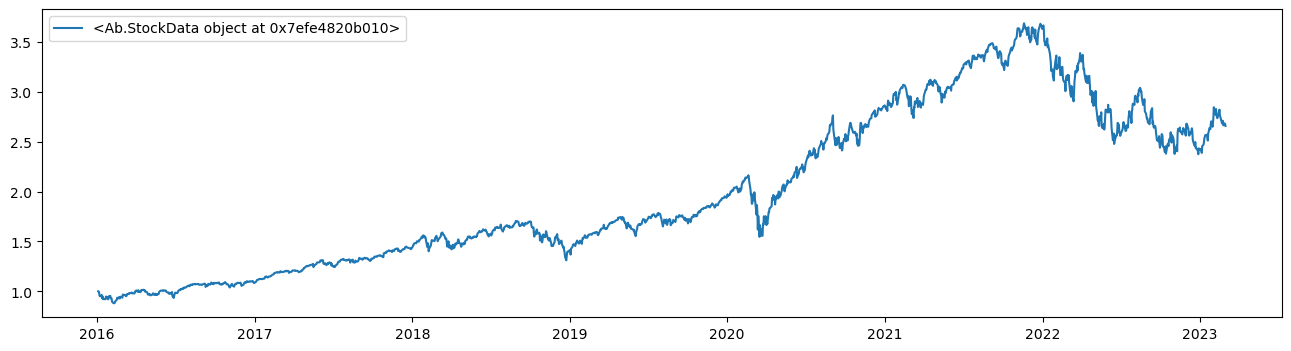

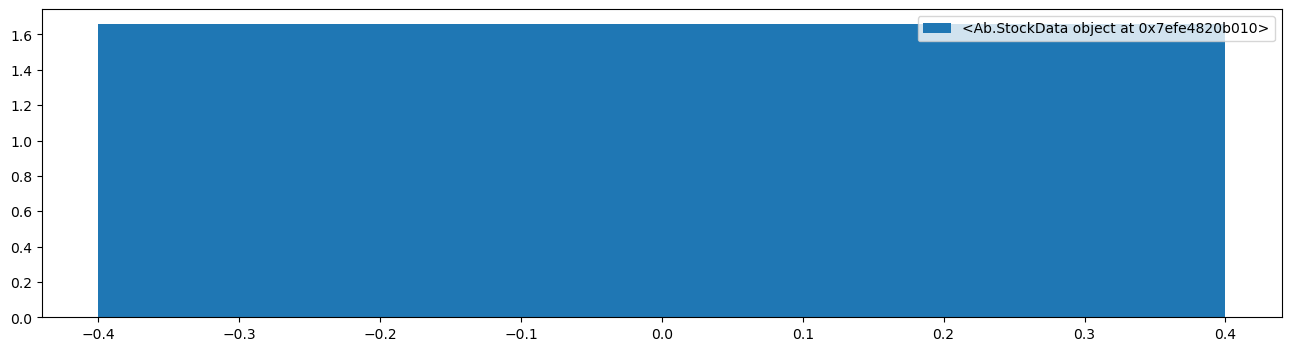

In [5]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [6]:
stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                                            spy_consecutive_buy_threshold = 1, spy_consecutive_days = 20,
                                            spy_max_off_new_high_pct = -0.2)
stg.run_strategy([ffty,spy], test_start, test_end)


In [7]:

stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)



fftyspy_stg:
cumulative return      : 193.72%
compound anual return  : 6.8357%
max_drawdown           : -14.16%
sharp_ratio            : 7.35%
average of daily return: 0.0636%
std of daily return    : 0.8648%
number of trades       : 6,
trading days           : 2613,
batting Average        : 80.00%
Gain Average           : 33.73%
Loss Average           : -0.96%
Risk Reward Ratio      : 35.04
Gain STD               : 29.45%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant   Buy Price  Sell Price  \
0 2016-07-08  2018-10-10 00:00:00    QQQ  0.009066  110.300003  171.729996   
1 2019-03-13  2020-02-27 00:00:00    QQQ  0.008796  177.009995  205.639999   
2 2020-06-16  2021-12-13 00:00:00    QQQ  0.007448  242.850006  392.260010   
3 2023-02-13  2023-02-15 00:00:00    QQQ  0.009595  304.500000  309.100006   
4 2023-02-21  2023-03-01 00:00:00    QQQ  0.010086  294.029999  291.200012   

     Profit  Profit %  
0  0.556936  0.556936  
1  0.251822  0.1

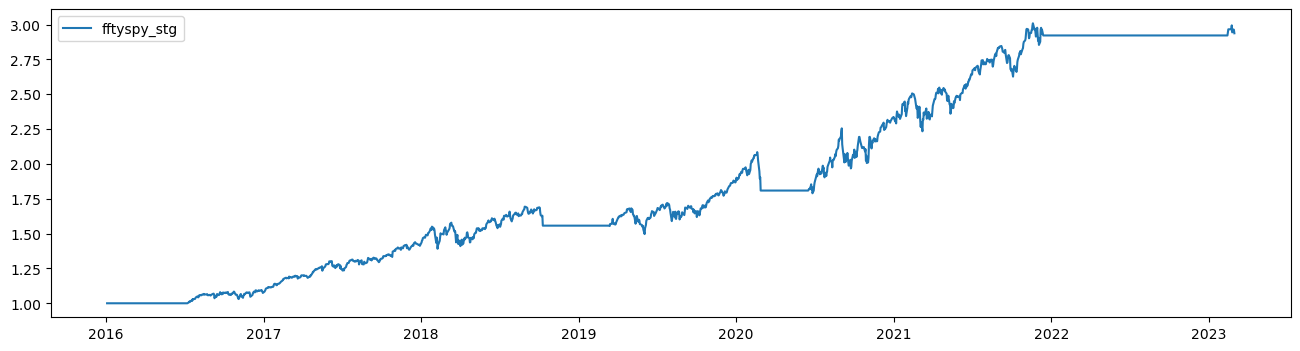

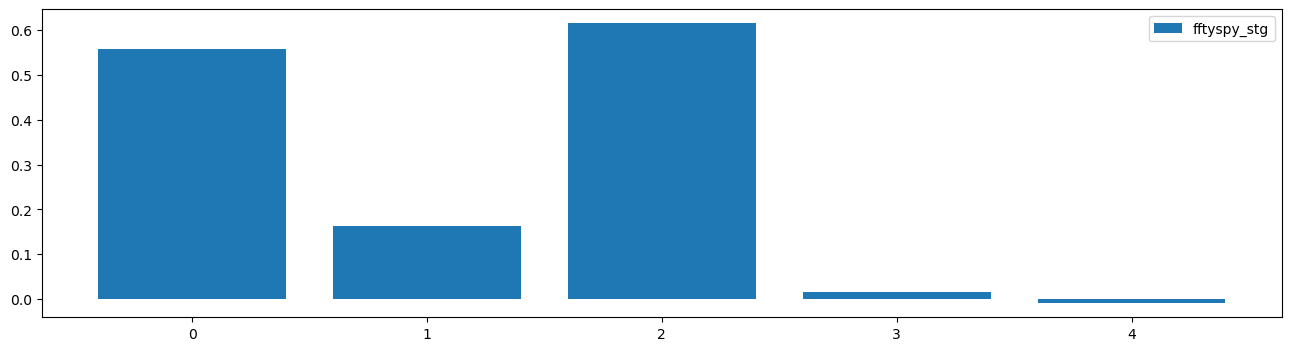

In [8]:

stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()
print(stg_bt.trade_records)


Index(['QQQ', 'Weekday', 'Signal', 'Cash', 'Stock', 'Total', 'Margin', 'Trade',
       'Buy Price', 'Profit', 'FFTY', 'FFTY-SMA200', 'Signal_x', 'SPY',
       'SPY-SMA200', 'new_high', 'off_new_high', 'max_off_new_high',
       'SPY-to-SMA200', 'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'Signal_x', 'SPY', 'SPY-SMA200', 'new_high',
       'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')


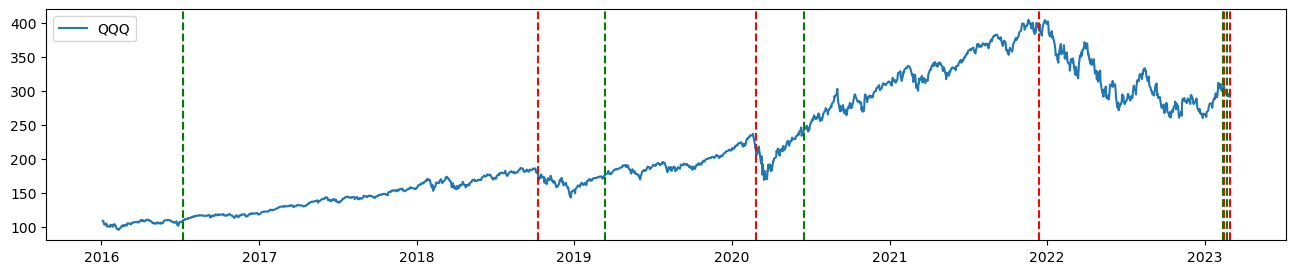

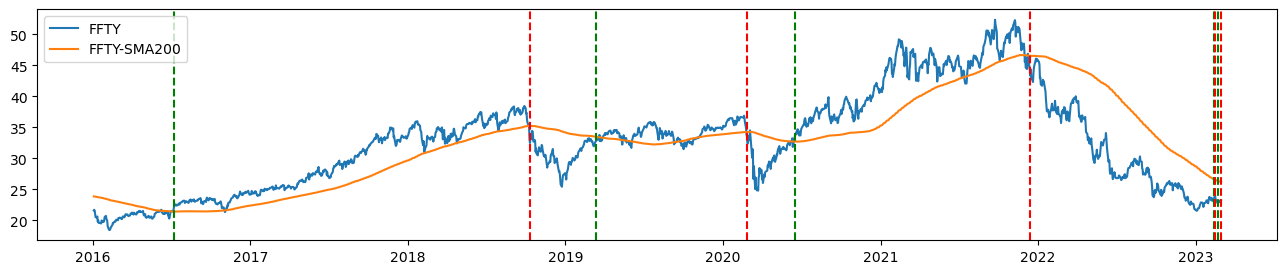

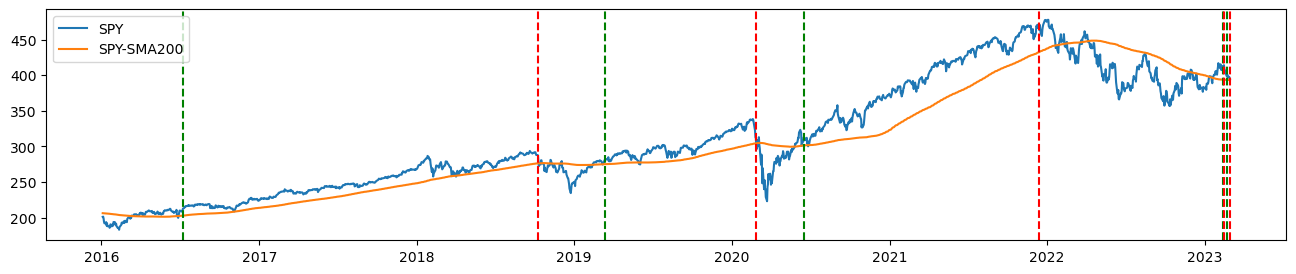

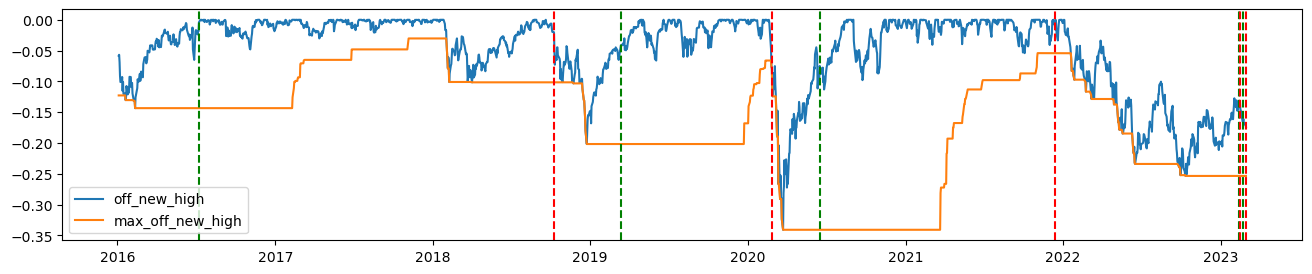

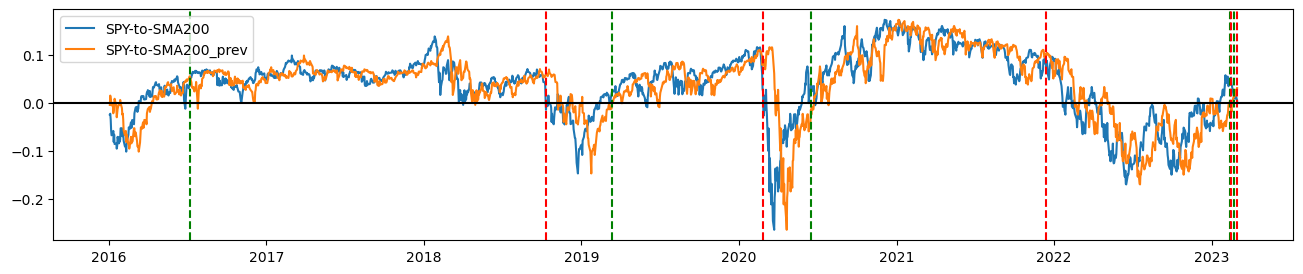

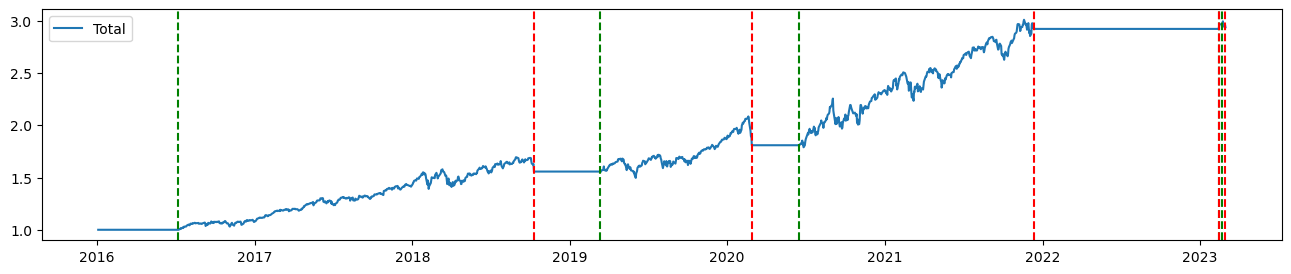

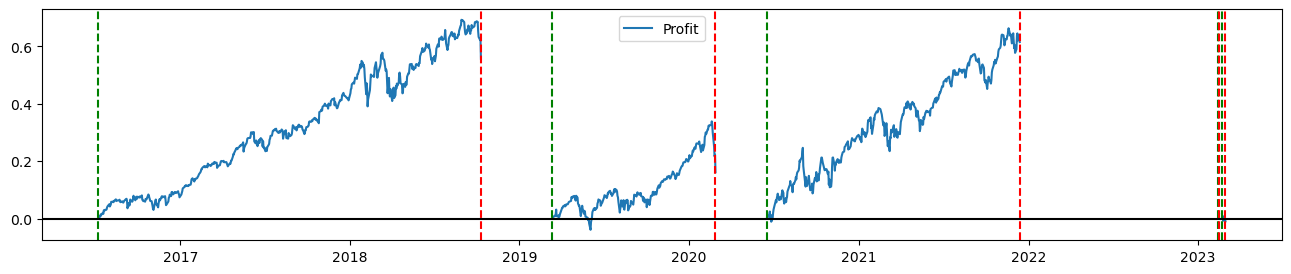

In [9]:
print(stg_bt.joined_data.columns)
print(stg.joined_data.columns)
stg_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY', 'SPY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['off_new_high', 'max_off_new_high'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY-to-SMA200','SPY-to-SMA200_prev'], plot_start, plot_end, ydash_low=0)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)


fftyspy_stg:
cumulative return      : 207.72%
compound anual return  : 7.5838%
max_drawdown           : -14.20%
sharp_ratio            : 7.44%
average of daily return: 0.0664%
std of daily return    : 0.8929%
number of trades       : 6,
trading days           : 2613,
batting Average        : 80.00%
Gain Average           : 35.28%
Loss Average           : -0.43%
Risk Reward Ratio      : 82.89
Gain STD               : 30.65%
Loss STD               : nan%
        
Index(['QQQ', 'Weekday', 'Signal', 'Cash', 'Stock', 'Total', 'Margin', 'Trade',
       'Buy Price', 'Profit', 'FFTY', 'FFTY-SMA200', 'Signal_x', 'SPY',
       'SPY-SMA200', 'new_high', 'off_new_high', 'max_off_new_high',
       'SPY-to-SMA200', 'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')
Index(['FFTY', 'FFTY-SMA200', 'Signal_x', 'SPY', 'SPY-SMA200', 'new_high',
       'off_new_high', 'max_off_new_high', 'SPY-to-SMA200',
       'SPY-to-SMA200_prev', 'Signal_y'],
      dtype='object')


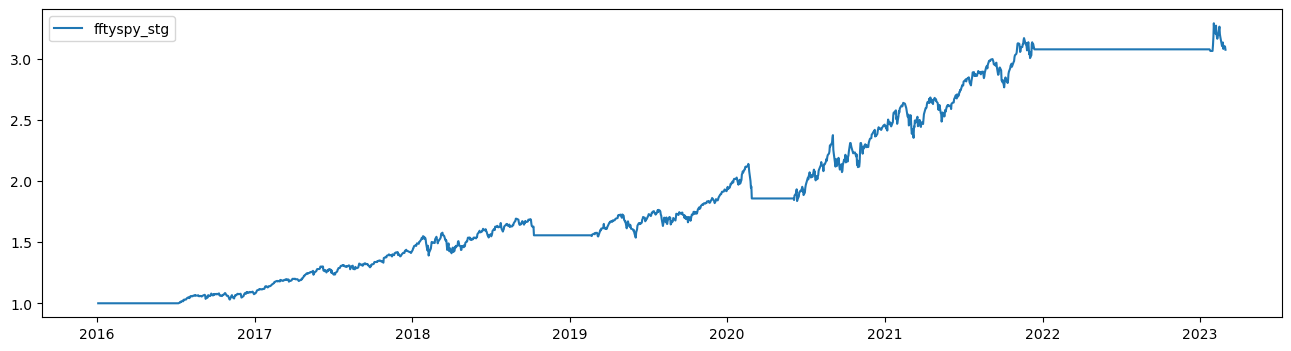

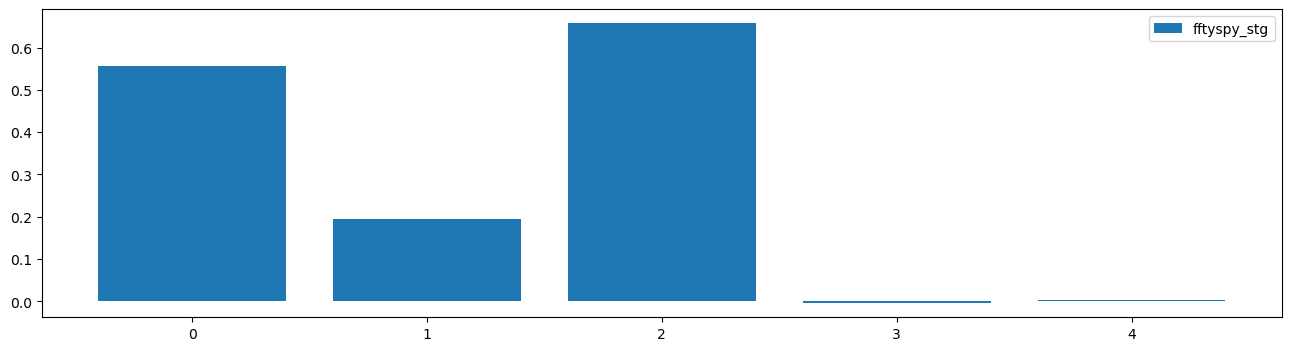

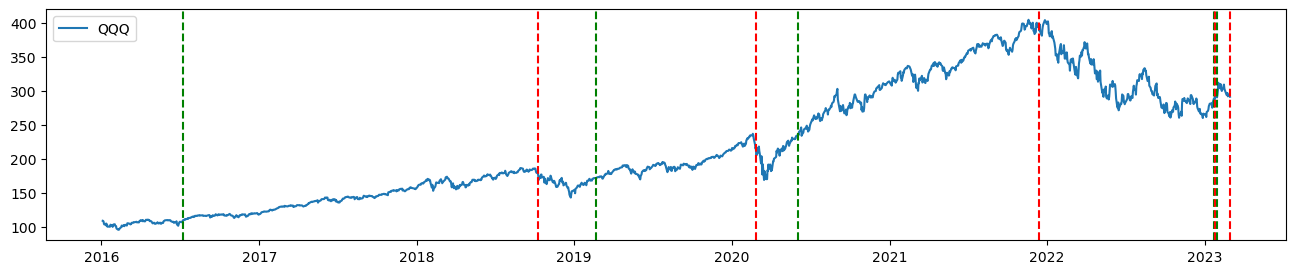

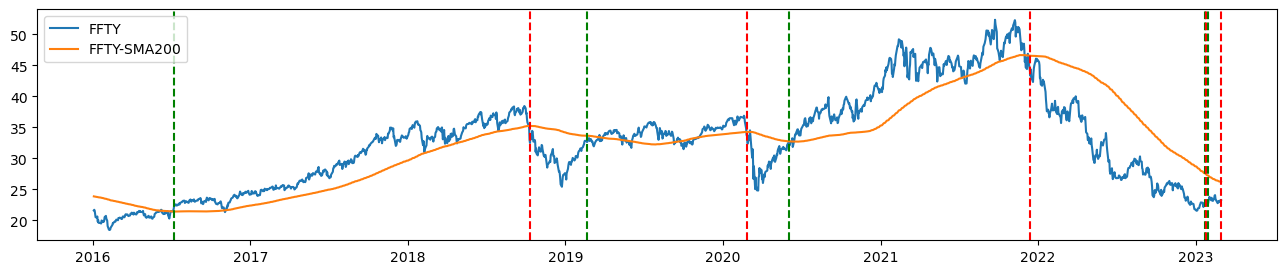

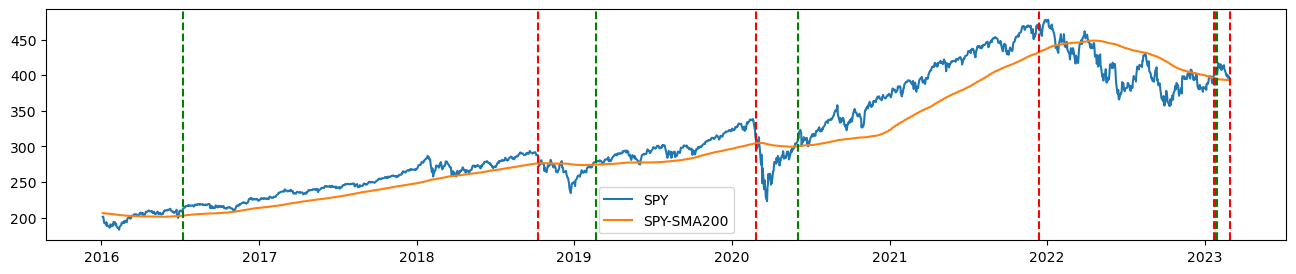

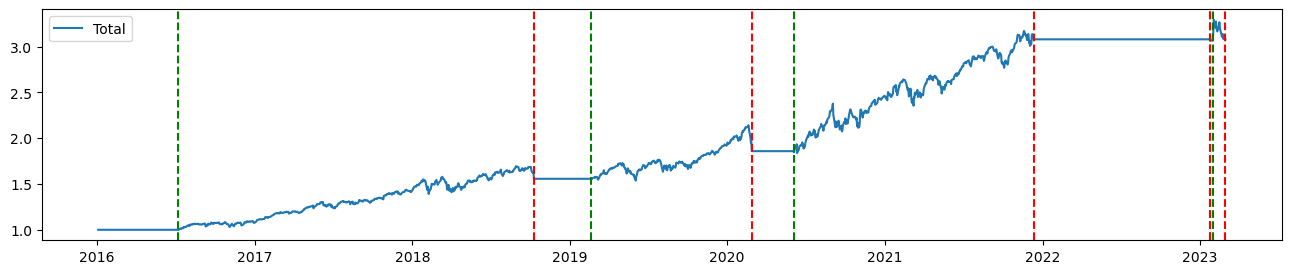

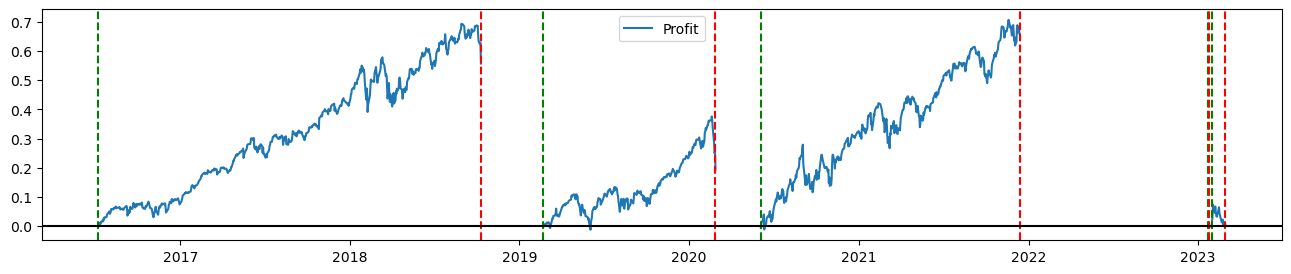

In [10]:
 
stg = ab.fftyspy_stg(ffty_sell_threshold = 0.95, ffty_buy_threshold = 1.02, 
                 spy_consecutive_buy_threshold = 1, spy_consecutive_days = 5,
                 spy_max_off_new_high_pct = -0.2)
stg.run_strategy([ffty,spy], test_start, test_end)
stg_bt = ab.BackTest()
stg_bt.run_backtest(stg,ticker,test_start,test_end)

stg_bt.plot_balance()
stg_bt.plot_records()
stg_bt.performance_summary()

print(stg_bt.joined_data.columns)
print(stg.joined_data.columns)
stg_bt.plot_joined_data([ticker.ticker], plot_start, plot_end)
stg_bt.plot_joined_data(['FFTY', 'FFTY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['SPY', 'SPY-SMA200'], plot_start, plot_end)
stg_bt.plot_joined_data(['Total'], plot_start, plot_end)
stg_bt.plot_joined_data(['Profit'], plot_start, plot_end, ydash_low=0)